<a href="https://colab.research.google.com/github/prikmm/MLprojects/blob/main/notebooks/DL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.4.1'

In [7]:
keras.__version__

'2.4.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
y_uni = np.unique(y_train)
y_uni

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
import matplotlib.pyplot as plt

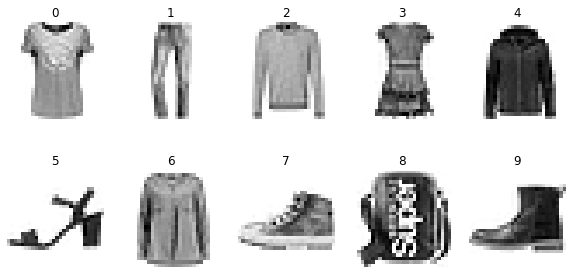

In [15]:
row_num = 2
col_num = 5
fig, axs = plt.subplots(figsize=(10, 5), nrows=row_num, ncols=col_num)
fig.set_facecolor("white")
for i in y_uni:
    images_index = np.where(y_train == i)
    image = X_train[images_index[0][0]]
    col = i % 5
    row = i // 5
    axs[row, col].imshow(image, cmap="binary")
    axs[row, col].set_title(i)
    axs[row, col].axis('off')

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

# we can generally use:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer('dense') is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06944151, -0.06175592, -0.03090459, ..., -0.04865481,
         0.06703101, -0.05205276],
       [ 0.00906612, -0.07415856,  0.0214153 , ...,  0.01805488,
        -0.00101572, -0.04409547],
       [ 0.00706562,  0.02225506,  0.0733227 , ..., -0.03876532,
        -0.0602366 ,  0.0192215 ],
       ...,
       [ 0.01376984, -0.06284463, -0.03650165, ..., -0.03876186,
         0.03802157, -0.01457663],
       [-0.07435139, -0.04087222, -0.03221072, ...,  0.00350874,
        -0.05049813,  0.06921202],
       [ 0.02030862,  0.00340139, -0.02611431, ...,  0.02181779,
         0.00999168, -0.06539443]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics="accuracy")    

In [29]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0035 - accuracy: 0.6747 - val_loss: 0.5459 - val_accuracy: 0.8142
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5026 - accuracy: 0.8242 - val_loss: 0.4379 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4551 - accuracy: 0.8401 - val_loss: 0.4278 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4219 - accuracy: 0.8518 - val_loss: 0.3921 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8560 - val_loss: 0.3958 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3885 - accuracy: 0.8665 - val_loss: 0.3787 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8736 - val_loss: 0.3595 - val_accuracy:

In [30]:
import pandas as pd

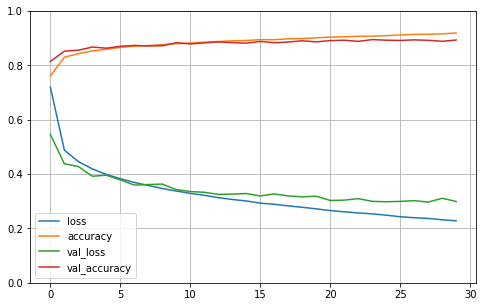

In [31]:
fig = pd.DataFrame(history.history).plot(figsize=(8, 5))
fig.grid(True)
plt.gca().set_ylim(0, 1)
fig.set_facecolor("white")
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.7772 - accuracy: 0.8624


[56.77720642089844, 0.8623999953269958]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))
mse_model = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1893 - val_loss: 0.5375
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5003 - val_loss: 0.5337
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6517 - val_loss: 0.4716
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.4124
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3994 - val_loss: 0.3916
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.3888
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 0.3838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4430 - val_loss: 0.3809
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.3764
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3598 - val_loss: 0.3751

## Complex Models:

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 4.5402 - val_loss: 1.9105
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5438 - val_loss: 1.0327
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9506 - val_loss: 0.8040
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7675 - val_loss: 0.7269
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6903 - val_loss: 0.6923
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6775 - val_loss: 0.6675
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6356 - val_loss: 0.6436
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6196 - val_loss: 0.6299
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6046 - val_loss: 0.6123
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6067 - val_loss: 0.5994

array([[1.9213536],
       [1.6636106],
       [2.2090874]], dtype=float32)

In [42]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="auxillary_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.4991 - main_output_loss: 2.4238 - auxillary_output_loss: 3.1767 - val_loss: 0.7186 - val_main_output_loss: 0.6465 - val_auxillary_output_loss: 1.3673
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4831 - main_output_loss: 1.4904 - auxillary_output_loss: 1.4176 - val_loss: 0.9239 - val_main_output_loss: 0.8902 - val_auxillary_output_loss: 1.2268
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7069 - main_output_loss: 0.6467 - auxillary_output_loss: 1.2489 - val_loss: 0.6333 - val_main_output_loss: 0.5781 - val_auxillary_output_loss: 1.1301
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7827 - main_output_loss: 0.7473 - auxillary_output_loss: 1.1012 - val_loss: 1.2449 - val_main_output_loss: 1.2701 - val_auxillary_output_loss: 1.0186
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0613 - main_output_l

(814849.25, 905388.125, 0.7061370015144348)

In [43]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[-25.07661  ],
        [  6.1562443],
        [-37.81606  ]], dtype=float32), array([[2.379313 ],
        [1.7641158],
        [2.467177 ]], dtype=float32))

In [44]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=10, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [47]:
model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [51]:
model.summary()

Model: "wide_and_deep_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  70        
_________________________________________________________________
dense_17 (Dense)             multiple                  110       
_________________________________________________________________
dense_18 (Dense)             multiple                  16        
_________________________________________________________________
dense_19 (Dense)             multiple                  11        
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6584 - output_1_loss: 0.6256 - output_2_loss: 0.9542
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - output_1_loss: 0.4982 - output_2_loss: 0.8374
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4630 - output_1_loss: 0.4373 - output_2_loss: 0.6938
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4434 - output_1_loss: 0.4195 - output_2_loss: 0.6592
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4718 - output_1_loss: 0.4460 - output_2_loss: 0.7046
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4448 - output_1_loss: 0.4235 - output_2_loss: 0.6365
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4312 - output_1_loss: 0.4105 - output_2_loss: 0.6172
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4224 - output_1_loss:

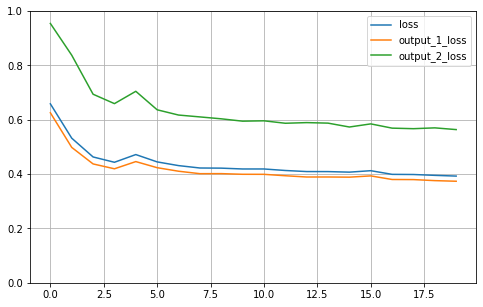

In [50]:
fig = pd.DataFrame(history.history).plot(figsize=(8, 5))
fig.grid(True)
plt.gca().set_ylim(0, 1)
fig.set_facecolor("white")
plt.show()

In [55]:
input_A = keras.layers.Input(shape=[5], name="Input_A")
input_B = keras.layers.Input(shape=[6], name="Input_B")
hidden1 = keras.layers.Dense(units=30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(units=30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
main_output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[main_output, aux_output])
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_batch_size=0.2)

model.save("my_keras_model.h5")   # Keras saves the model HDF5 format

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7849 - main_output_loss: 1.6953 - aux_output_loss: 2.5915
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5882 - main_output_loss: 0.5351 - aux_output_loss: 1.0662
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4863 - main_output_loss: 0.4447 - aux_output_loss: 0.8610
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4451 - main_output_loss: 0.4131 - aux_output_loss: 0.7332
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4277 - main_output_loss: 0.3991 - aux_output_loss: 0.6848
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4193 - main_output_loss: 0.3969 - aux_output_loss: 0.6213
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4325 - main_output_loss: 0.4133 - aux_output_loss: 0.6050
Epoch 8/20
363/363 [==============================] - 0s 1ms/s

In [56]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train)